This will be out **General Regressions' Validator** for different regression models we've studied through.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I. Import Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# II. Import a Data-Set

In [5]:
dataset_file_name = "/content/drive/MyDrive/Data analytics course/PP_Data.csv"
dataset_df = pd.read_csv(dataset_file_name)
dataset_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
#X
independant_var = dataset_df.iloc[:, :-1].values

#y
dependant_var = dataset_df.iloc[:, -1].values

# 3. Split Data-Set into Training and Test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(independant_var, dependant_var, test_size = 0.2, random_state = 0)

In [8]:
dependant_var_svr = dependant_var.reshape(len(dependant_var), 1)
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(independant_var, dependant_var_svr, test_size = 0.2, random_state = 0)

# III. Multi-Linear Regression

# III.4. Training of Machine Learning model

In [9]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# III.5. Run a prediction

In [10]:
y_pred = lin_reg_model.predict(X_test)

np.set_printoptions(precision=2)

pred_arr = (y_pred.reshape(len(y_pred), 1))
test_arr = (y_test.reshape(len(y_test), 1))

concat = np.concatenate((pred_arr, test_arr), 1)

print( concat )

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


# III.5 Evaluate result

In [11]:
r2_score_multy = r2_score(y_test, y_pred)
r2_score_multy*100

93.25315554761302

# IV. Polynomial Regression

# IV.4. Training of Machine Learning model

In [12]:
poly_reg = PolynomialFeatures(4)
X_poly_train = poly_reg.fit_transform(X_train)

poly_lin_reg_model = LinearRegression()
poly_lin_reg_model.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# IV.5. Run a prediction

In [13]:
y_pred = poly_lin_reg_model.predict(poly_reg.fit_transform(X_test))

np.set_printoptions(precision=2)

pred_arr = (y_pred.reshape(len(y_pred), 1))
test_arr = (y_test.reshape(len(y_test), 1))

concat = np.concatenate((pred_arr, test_arr), 1)

print( concat )

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


# IV.5 Evaluate result

In [14]:
r2_score_poly = r2_score(y_test, y_pred)
r2_score_poly*100

94.58192606428238

# V. Support Vector Regression (SVR)

# V.4. Feature Scaling


In [15]:
sc_X = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train_svr)

sc_y = StandardScaler()
y_train_svr = sc_y.fit_transform(y_train_svr)

# V.5. Training of Machine Learning model


In [16]:
svr_reg_model = SVR(kernel="rbf")
svr_reg_model.fit(X_train_svr, y_train_svr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# V.5. Run a prediction

In [17]:
y_pred = sc_y.inverse_transform(svr_reg_model.predict(sc_X.fit_transform(X_test_svr)))

np.set_printoptions(precision=2)

pred_arr = (y_pred.reshape(len(y_pred), 1))
test_arr = (y_test_svr.reshape(len(y_test_svr), 1))

concat = np.concatenate((pred_arr, test_arr), 1)

print( concat )

[[434.5  431.23]
 [457.71 460.01]
 [460.85 461.14]
 ...
 [470.22 473.26]
 [439.29 438.  ]
 [460.43 463.28]]


# V.6 Evaluate result

In [18]:
r2_score_svr = r2_score(y_test_svr, y_pred)
r2_score_svr*100

94.83693304317924

# VI. Descision Tree Regression

# VI.4. Training of Machine Learning model

In [19]:
dt_reg_model = DecisionTreeRegressor(random_state=0)
dt_reg_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

# VI.5. Run a prediction

In [20]:
y_pred = dt_reg_model.predict(X_test)

np.set_printoptions(precision=2)

pred_arr = (y_pred.reshape(len(y_pred), 1))
test_arr = (y_test.reshape(len(y_test), 1))

concat = np.concatenate((pred_arr, test_arr), 1)

print( concat )

[[431.28 431.23]
 [462.81 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.55 463.28]]


# VI.6 Evaluate result


In [21]:
r2_score_dt = r2_score(y_test_svr, y_pred)
r2_score_dt*100

92.26091050550042

# VII. Random Forest Regression

# VII.4. Training of Machine Learning model

In [22]:
rf_reg_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# VII.5. Run a prediction

In [23]:
y_pred = rf_reg_model.predict(X_test)

np.set_printoptions(precision=2)

pred_arr = (y_pred.reshape(len(y_pred), 1))
test_arr = (y_test.reshape(len(y_test), 1))

concat = np.concatenate((pred_arr, test_arr), 1)

print( concat )

[[433.78 431.23]
 [457.99 460.01]
 [463.14 461.14]
 ...
 [470.16 473.26]
 [439.51 438.  ]
 [460.32 463.28]]


# VII.6 Evaluate result


In [24]:
r2_score_rf = r2_score(y_test, y_pred)
r2_score_rf*100

96.15980699813016

#VIII. XGBoost

#Training of Machine Learning model

In [25]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

[17:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#Run a prediction

In [26]:
y_pred = xgb_model.predict(X_test)

np.set_printoptions(precision=2)

pred_arr = (y_pred.reshape(len(y_pred), 1))
test_arr = (y_test.reshape(len(y_test), 1))

concat = np.concatenate((pred_arr, test_arr), 1)

print( concat )

[[434.28 431.23]
 [456.98 460.01]
 [462.51 461.14]
 ...
 [470.14 473.26]
 [439.61 438.  ]
 [463.28 463.28]]


#Evaluate result

In [27]:
r2_score_xgb = r2_score(y_test, y_pred)
r2_score_xgb*100

95.12651115405842

#Training of Machine Learning model

#IX. CatBoost

In [29]:
!pip install catboost

     |████████████████████████████████| 67.3MB 70kB/s 


In [ ]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)

#Run a prediction

In [31]:
y_pred = catboost_model.predict(X_test)

np.set_printoptions(precision=2)

pred_arr = (y_pred.reshape(len(y_pred), 1))
test_arr = (y_test.reshape(len(y_test), 1))

concat = np.concatenate((pred_arr, test_arr), 1)

print( concat )

[[434.31 431.23]
 [457.65 460.01]
 [461.98 461.14]
 ...
 [471.7  473.26]
 [438.86 438.  ]
 [462.71 463.28]]


#Evaluate result

In [32]:
r2_score_cat = r2_score(y_test, y_pred)
r2_score_cat*100

96.64195873489176

(90.0, 100.0)

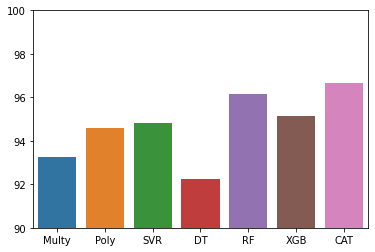

In [33]:
ax = sns.barplot(x=["Multy", "Poly", "SVR", "DT", "RF", "XGB", "CAT"], y=[r2_score_multy*100, r2_score_poly*100, r2_score_svr*100, r2_score_dt*100, r2_score_rf*100, r2_score_xgb*100, r2_score_cat*100])
ax.set_ylim(90, 100)